Tasks 3: Customer Segmentation


In [1]:
#loading data 
import pandas as pd
df=pd.read_csv("updated_dataset_after_task_1.csv")

In [2]:
df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contrac

In [3]:
df.dtypes

customerID                                  object
SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

Segment customers based on tenure,monthly charges, and contract type

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Select relevant features
features = df[['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']]


In [6]:
features

,tenure,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,29.85,True,False,False
1,34,56.95,False,True,False
2,2,53.85,True,False,False
3,45,42.30,False,True,False
4,2,70.70,True,False,False
...,...,...,...,...,...
7038,24,84.80,False,True,False
7039,72,103.20,False,True,False
7040,11,29.60,True,False,False
7041,4,74.40,True,False,False


In [7]:
# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-1.27744458, -1.16032292,  0.90418382, -0.51424938, -0.56297505],
       [ 0.06632742, -0.25962894, -1.1059698 ,  1.94458183, -0.56297505],
       [-1.23672422, -0.36266036,  0.90418382, -0.51424938, -0.56297505],
       ...,
       [-0.87024095, -1.1686319 ,  0.90418382, -0.51424938, -0.56297505],
       [-1.15528349,  0.32033821,  0.90418382, -0.51424938, -0.56297505],
       [ 1.36937906,  1.35896134, -1.1059698 , -0.51424938,  1.77627764]])

In [8]:
n_clusters = 3  # Example: You can choose a different number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(features_scaled)

C:\Users\aruna\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
df.Segment.unique()

array([1, 2, 0])

In [10]:
cluster_analysis = df.groupby('Segment')[['tenure', 'MonthlyCharges']].mean()
print(cluster_analysis)


            tenure  MonthlyCharges
Segment                           
0        56.735103       60.770413
1        18.036645       66.398490
2        42.044807       65.048608


c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


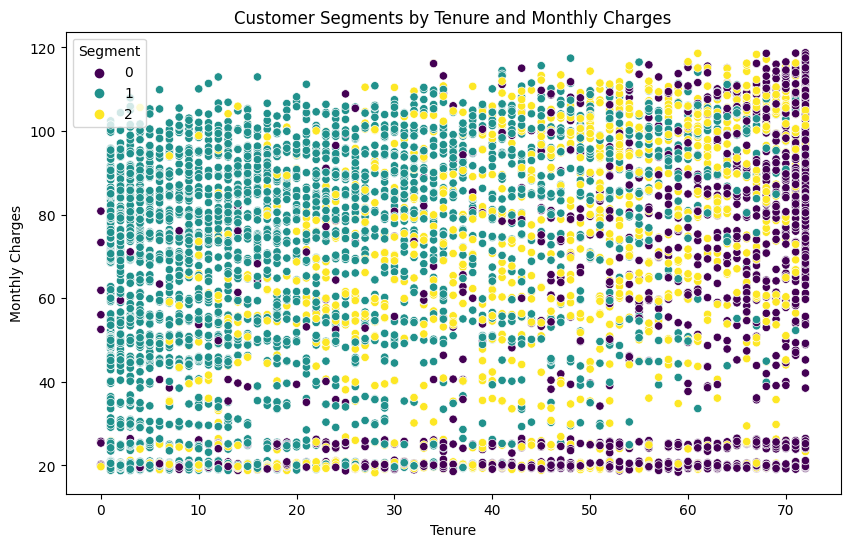

In [11]:
# Visualize the distribution of clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Segment', data=df, palette='viridis')
plt.title('Customer Segments by Tenure and Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Segment')
plt.show()

Analyze churn rates across these segments.

In [12]:
cluster_analysis2 = df.groupby('Segment')[['Churn_Yes','Churn_No']].mean()
print(cluster_analysis2)


         Churn_Yes  Churn_No
Segment                     
0         0.028319  0.971681
1         0.427097  0.572903
2         0.112695  0.887305


<Axes: xlabel='Segment'>

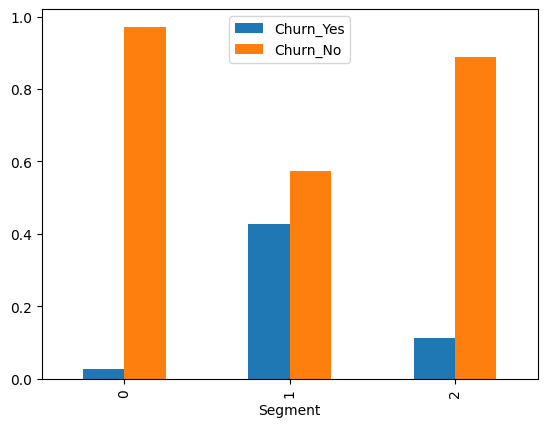

In [13]:
cluster_analysis2.plot(kind='bar')